In [5]:
import pandas as pd
from google.colab import files

In [6]:
#leer el archivo
df = pd.read_csv("/content/movies_dataset_clean.csv")
# Imprimir las primeras 5 filas
df.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,languages,director,overview_clean,release_year,return
0,30000000,"animation,comedy,family",862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,English,John Lasseter,led by woody andys toy live happily in his roo...,1995,12.451801
1,65000000,"adventure,fantasy,family",8844,en,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,"English,Français",Joe Johnston,when sibling judy and peter discover an enchan...,1995,4.043035
2,0,"romance,comedy",15602,en,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,English,Howard Deutch,a family wedding reignites the ancient feud be...,1995,0.000000
3,16000000,"comedy,drama,romance",31357,en,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,English,Forest Whitaker,cheated on mistreated and stepped on the woman...,1995,5.090760
4,0,comedy,11862,en,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,English,Charles Shyer,just when george bank ha recovered from his da...,1995,0.000000


In [7]:
# Lista con los nombres de todos los campos presentes
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45431 entries, 0 to 45430
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45431 non-null  int64  
 1   genres             44915 non-null  object 
 2   id                 45431 non-null  int64  
 3   original_language  45420 non-null  object 
 4   popularity         45428 non-null  float64
 5   release_date       45431 non-null  object 
 6   revenue            45431 non-null  float64
 7   runtime            45412 non-null  float64
 8   title              45431 non-null  object 
 9   vote_average       45428 non-null  float64
 10  vote_count         45428 non-null  float64
 11  languages          41478 non-null  object 
 12  director           44559 non-null  object 
 13  overview_clean     45431 non-null  object 
 14  release_year       45431 non-null  int64  
 15  return             45431 non-null  float64
dtypes: float64(6), int64(3

In [8]:
#verficacion de valores faltantes
df.isnull().sum()

,0
budget,0
genres,516
id,0
original_language,11
popularity,3
release_date,0
revenue,0
runtime,19
title,0
vote_average,3


In [9]:
# Se crea una lista de las columnas que se desean eliminar de
columns_drop = ['overview', 'production_companies', 'production_countries', 'status', 'tagline', 'actors']
# Se eliminan las columnas especificadas en columns_drop
df.drop(columns_drop, axis = 1, inplace = True)
# Verificar que los cambios se realizaron
df.columns

KeyError: "['overview', 'production_companies', 'production_countries', 'status', 'tagline', 'actors'] not found in axis"

In [ ]:
#verficacion de valores faltantes
df.isnull().sum()

In [ ]:
#guardar data limpia
df.to_csv('movies_dataset_clean.csv', index=False)
#descargar data limpia

files.download('movies_dataset_clean.csv')

**ANALISIS EDA**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [11]:
# Cargar el dataset
df = pd.read_csv('movies_dataset_clean.csv')

Analisis Univariado

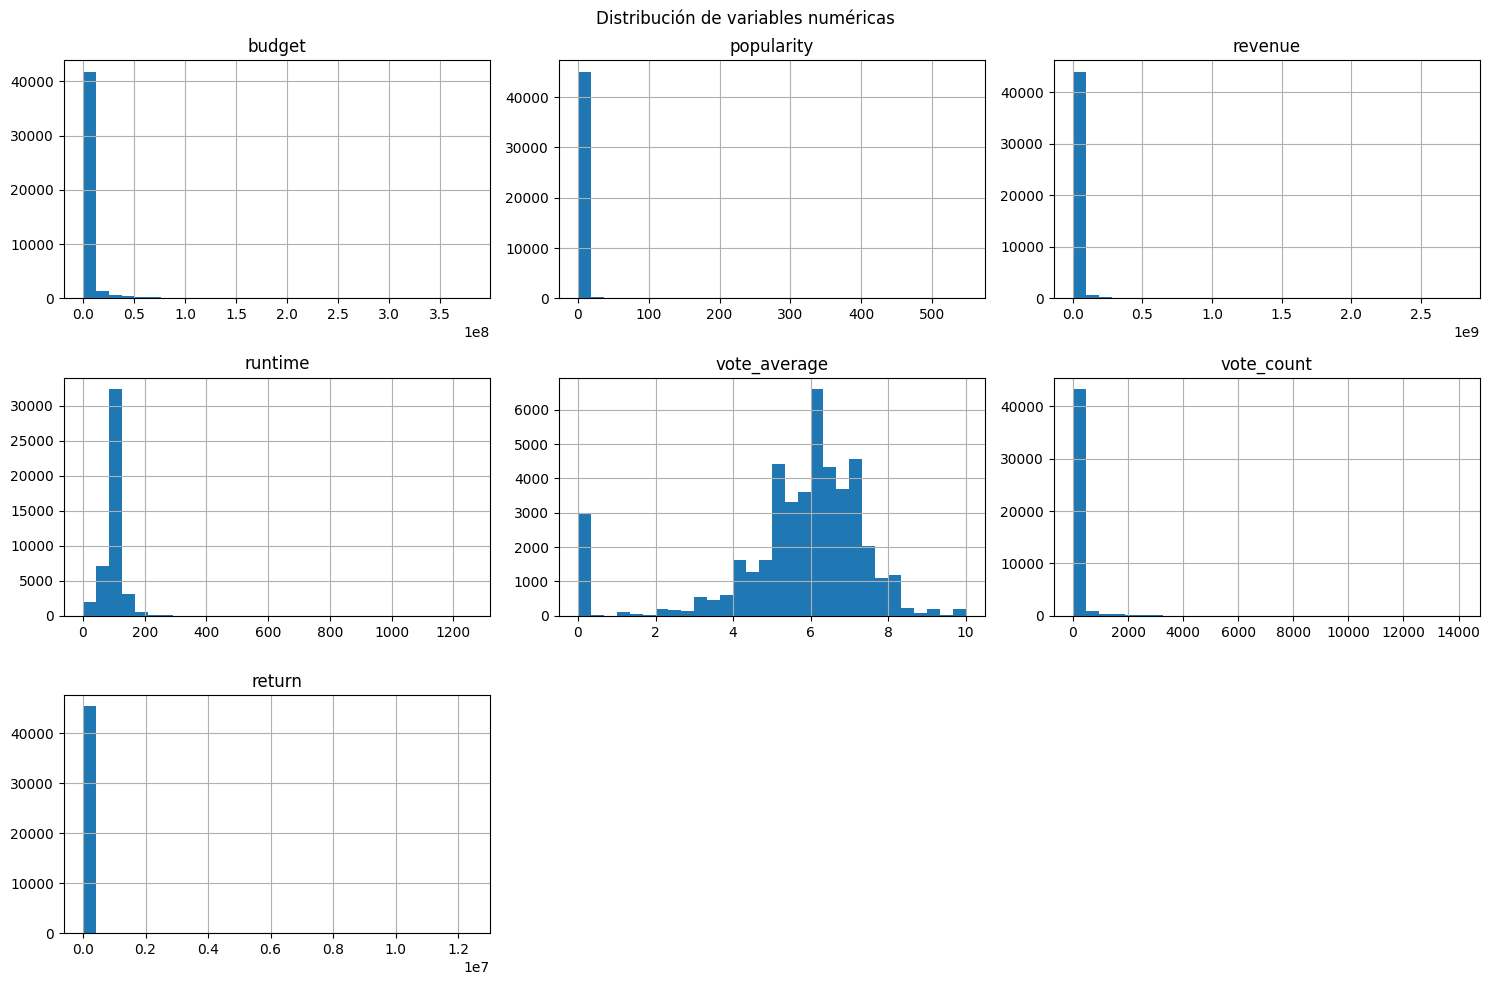

In [12]:
# Histograma para las columnas numéricas
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']
df[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas')
plt.tight_layout()
plt.show()

<ipython-input-13-9bddb126566e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_popular['popularity'], y=top10_popular['title'], palette='viridis')


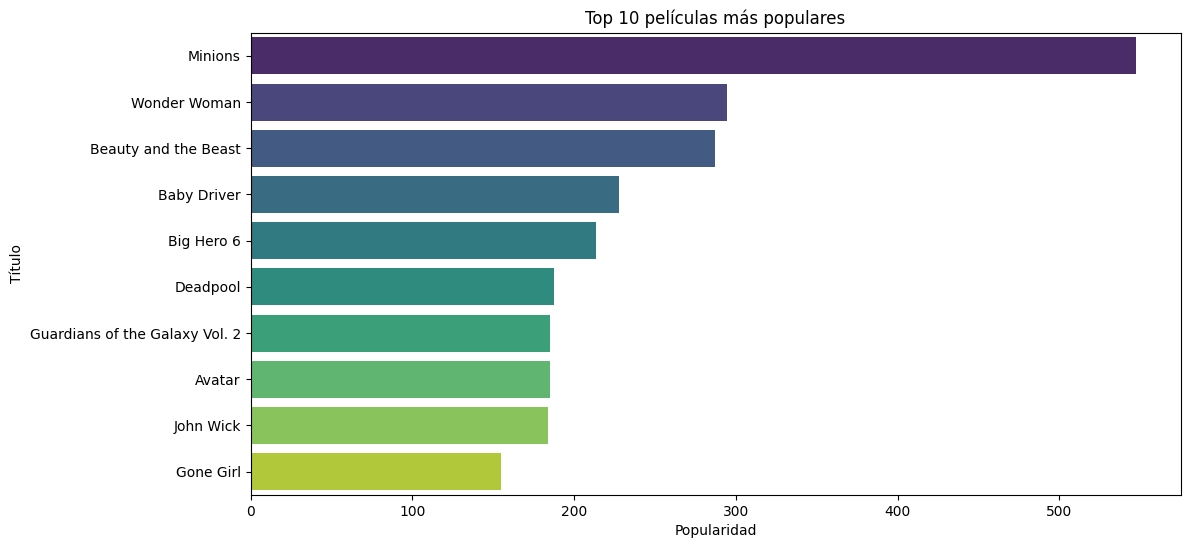

In [13]:
# Gráfico de barras para las 10 películas más populares
top10_popular = df.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_popular['popularity'], y=top10_popular['title'], palette='viridis')
plt.title('Top 10 películas más populares')
plt.xlabel('Popularidad')
plt.ylabel('Título')
plt.show()

<ipython-input-14-26c19a6e3a0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


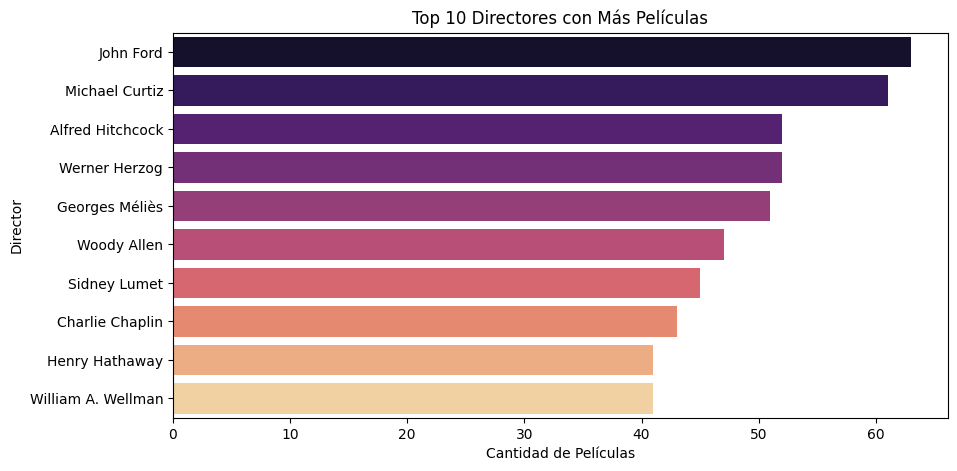

In [14]:
# Top 10 directores con más películas
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directores con Más Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Director')
plt.show()

<ipython-input-15-f6dca9b7358a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


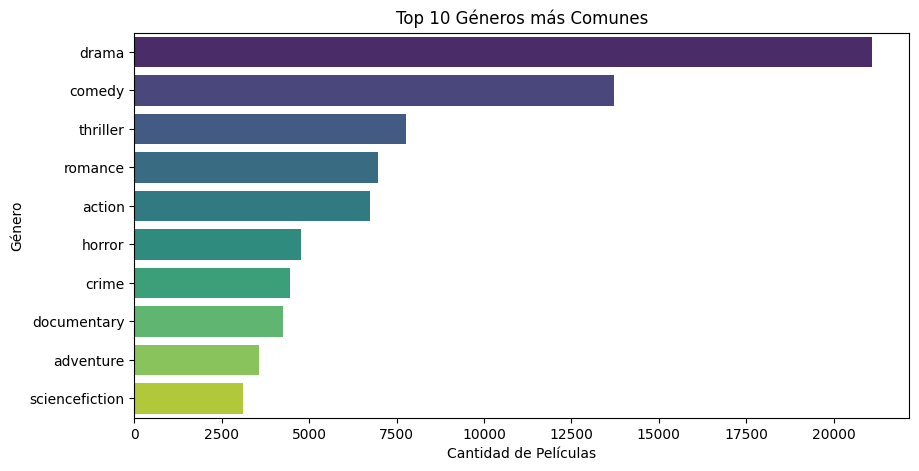

In [15]:
#generos mas comunes
df['genres'] = df['genres'].str.split(',')
top_genres = df['genres'].explode().value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Géneros más Comunes')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Género')
plt.show()

Analisis bivariado

In [ ]:
# Matriz de correlación para columnas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [ ]:
# Gráfico de dispersión para presupuesto vs ingresos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.5)
plt.title('Presupuesto vs Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()

Analisis por genero

In [ ]:
#genero por voto promedio
df_genres = df[['genres', 'vote_average']].copy()
df_genres['genres'] = df_genres['genres'].str.split(',')
df_genres = df_genres.explode('genres')

# Calcular el voto promedio por género
genre_vote_avg = df_genres.groupby('genres')['vote_average'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='vote_average', y='genres', data=genre_vote_avg, palette='viridis')
plt.title('Relación entre Géneros y Voto Promedio')
plt.xlabel('Voto Promedio')
plt.ylabel('Género')
plt.show()


In [ ]:
#generos por numero de peliculas
df_genres = df[['genres']].copy()
df_genres['genres'] = df_genres['genres'].str.split(',')
df_genres = df_genres.explode('genres')

# Contar el número de películas por género
genre_counts = df_genres['genres'].value_counts().reset_index()
genre_counts.columns = ['genre', 'num_movies']

plt.figure(figsize=(14, 7))
sns.barplot(x='num_movies', y='genre', data=genre_counts, palette='viridis')
plt.title('Distribución de Géneros por Número de Películas')
plt.xlabel('Número de Películas')
plt.ylabel('Género')
plt.show()


In [ ]:
# Análisis de la tendencia de producción de películas a lo largo de los años
plt.figure(figsize=(16, 6))
# Ordenar los años en orden cronológico
sns.countplot(x='release_year', data=df, palette='viridis', order=sorted(df['release_year'].unique()))

plt.title('Tendencia de producción de películas por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de películas')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Relación entre la puntuación media y el presupuesto
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='budget', y='vote_average', hue='release_year', palette='coolwarm', alpha=0.7)
plt.title('Relación entre Presupuesto y Puntuación Media')
plt.xlabel('Presupuesto')
plt.ylabel('Puntuación Media')
plt.legend(title='Año de Lanzamiento', bbox_to_anchor=(1, 1))
plt.show()